In [ ]:
=

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import os
for dirname, _, filenames in os.walk('input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/bird-audio-detection/warblrb10k_public_metadata.csv
/kaggle/input/bird-audio-detection/ff1010bird_metadata.csv
/kaggle/input/bird-audio-detection/ff1010bird_wav/wav/122191.wav
/kaggle/input/bird-audio-detection/ff1010bird_wav/wav/168772.wav
/kaggle/input/bird-audio-detection/ff1010bird_wav/wav/169560.wav
/kaggle/input/bird-audio-detection/ff1010bird_wav/wav/93649.wav
/kaggle/input/bird-audio-detection/ff1010bird_wav/wav/45906.wav
/kaggle/input/bird-audio-detection/ff1010bird_wav/wav/62510.wav
/kaggle/input/bird-audio-detection/ff1010bird_wav/wav/95027.wav
/kaggle/input/bird-audio-detection/ff1010bird_wav/wav/56546.wav
/kaggle/input/bird-audio-detection/ff1010bird_wav/wav/133091.wav
/kaggle/input/bird-audio-detection/ff1010bird_wav/wav/32548.wav
/kaggle/input/bird-audio-detection/ff1010bird_wav/wav/107216.wav
/kaggle/input/bird-audio-detection/ff1010bird_wav/wav/86944.wav
/kaggle/input/bird-audio-detection/ff1010bird_wav/wav/80709.wav
/kaggle/input/bird-audio-detection/ff1

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('ff1010bird_metadata.csv')
print(f'Number of Labels: {df.shape[0]}')
df.head()

Number of Labels: 7690


itemid  hasbird
0   64486        0
1    2525        0
2   44981        0
3  101323        0
4  165746        0

In [ ]:
print('Number of audios with bird sounds: {}'.format(df[df['hasbird'] == 1].shape[0]))
print('Number of audios without bird sounds: {}'.format(df[df['hasbird'] == 0].shape[0]))

Number of audios with bird sounds: 1935
Number of audios without bird sounds: 5755


## Loading some audio files

In [ ]:
import IPython.display as ipd
filepath = "ff1010bird_wav/wav/64486.wav"
ipd.Audio(filepath)

In [ ]:
#Check for  corresponding audio label
def check_label(filepath):
    file_num = int(filepath.split('/')[-1].split('.')[0])
    file_label = df[df['itemid'] == file_num].hasbird.values[0]
    if file_label == 1:
        file_label = 'Has Bird'
    else:
        file_label = 'No Bird'
    file_label
    return file_label
check_label(filepath)

'No Bird'

In [ ]:
#Audio waveplot
import librosa
import librosa.display
data, sample_rate = librosa.load(filepath)
file_label = check_label(filepath)
plt.figure(figsize=(12, 5))
plt.title(f'Waveplot: {file_label}')
librosa.display.waveshow(data, sr=sample_rate)

In [ ]:
#Audio With Bird
filepath = "ff1010bird_wav/wav/100.wav"

#Waveplot
file_label = check_label(filepath)
data, sample_rate = librosa.load(filepath)
plt.figure(figsize=(12, 5))
plt.title(f'Waveplot: {file_label}')
librosa.display.waveshow(data, sr=sample_rate)
#Play Audio
print('Audio')
ipd.Audio(filepath)

Audio


# **Data Preprocessing**

## Spectograms

Text(0.5, 1.0, 'Linear-frequency power spectrogram - Bird')

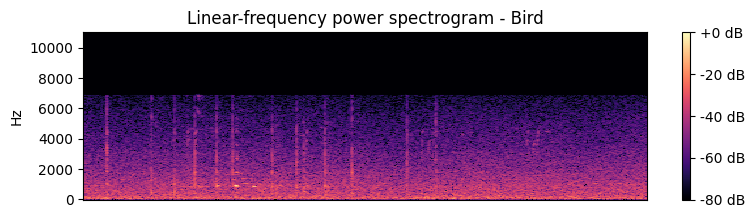

In [ ]:
data1, sample_rate1 = librosa.load('ff1010bird_wav/wav/100.wav')
plt.figure(figsize=(20, 10))
D = librosa.amplitude_to_db(np.abs(librosa.stft(data1)), ref=np.max)
plt.subplot(4, 2, 1)
librosa.display.specshow(D, y_axis='linear')
plt.colorbar(format='%+2.0f dB')
plt.title('Linear-frequency power spectrogram - Bird')

In [ ]:
data1, sample_rate1 = librosa.load("ff1010bird_wav/wav/64486.wav")
plt.figure(figsize=(20, 10))
D = librosa.amplitude_to_db(np.abs(librosa.stft(data1)), ref=np.max)
plt.subplot(4, 2, 1)
librosa.display.specshow(D, y_axis='linear')
plt.colorbar(format='%+2.0f dB')
plt.title('Linear-frequency power spectrogram - No Bird')

Text(0.5, 1.0, 'Linear-frequency power spectrogram - No Bird')

## Extracting MFCCs

In [ ]:
mfccs = librosa.feature.mfcc(y=data, sr=sample_rate, n_mfcc=40)
print(mfccs.shape)
print(mfccs)

(40, 431)
[[-211.73778    -177.58757    -173.58707    ... -164.73596
  -165.11739    -173.49536   ]
 [ 152.60025     166.969       168.62424    ...  168.19472
   165.89404     163.96457   ]
 [ -35.97773     -41.371136    -41.747856   ...  -43.47056
   -43.68884     -43.52542   ]
 ...
 [  -1.2112217     0.8197458     1.6768781  ...    0.87309766
     1.2970285     1.6384445 ]
 [  -4.738537     -3.7704623    -2.8193715  ...   -0.78065133
    -3.8629205    -3.6080923 ]
 [   0.94924617   -2.9222112    -2.4168248  ...   -4.5249405
    -5.274405     -6.5446196 ]]


In [ ]:
np.mean(mfccs.T,axis=0)

array([-1.7469612e+02,  1.6504648e+02, -4.2895096e+01,  3.2836990e+01,
       -1.1880407e+01,  1.2489353e+01,  7.9391843e-01,  3.1470513e+00,
        8.5965252e+00, -2.7512918e+00,  8.0165129e+00, -7.0795841e+00,
        2.4591157e+00, -1.3784740e+00,  9.8248935e-01, -2.8652040e-02,
       -1.8623466e+00,  2.9998217e+00, -3.9116306e+00,  1.8116752e+00,
       -3.6220167e+00, -2.0801283e-01, -4.6719071e-01, -2.2351182e+00,
       -1.2149537e+00, -3.3220973e+00,  1.1128432e+00, -3.6470001e+00,
       -1.0877315e+00, -2.3497167e+00, -9.7850823e-01, -7.2727031e-01,
       -2.5931904e+00, -1.5914151e-01, -3.7709994e+00, -1.0115611e-01,
       -2.4776671e+00, -1.0021477e+00, -4.7088793e-01, -1.6353331e+00],
      dtype=float32)

In [ ]:
np.mean(mfccs.T,axis=0).shape

(40,)

In [ ]:
#We define a function to extract the mfcc features from the audio
def extract_mfcc_features(filename):
    #Load audio file
    data1, sample_rate1 = librosa.load(filename)
    #Extract mfcc features
    mfccs_features = librosa.feature.mfcc(y=data1, sr=sample_rate1, n_mfcc=40)
    #in order to find out scaled feature we do mean of transpose of value
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    return mfccs_scaled_features

In [ ]:
#We now extract the mfcc features from the audios we have
features = []
labels = []
for dirname, _, filenames in os.walk('ff1010bird_wav/wav'):
    for filename in filenames:
        my_filename = os.path.join(dirname, filename)
        mfccs_scaled_features = extract_mfcc_features(my_filename)
        features.append(mfccs_scaled_features)
        file_label = check_label(my_filename)
        labels.append(file_label)

In [ ]:
print(f'Num Features: {len(features)}')
print(f'Num Labels: {len(labels)}')

Num Features: 7690
Num Labels: 7690


In [ ]:
#Create a DataFrame consisting of features and labels
df = pd.DataFrame({'MFCCs':features,
                  'labels':labels })
df.head()

MFCCs    labels
0  [-114.2202, 137.70438, -43.84075, 23.075796, -...   No Bird
1  [-442.35867, 96.438156, 8.438212, 14.243377, 5...   No Bird
2  [-197.99702, -30.843569, 38.032383, 26.303274,...  Has Bird
3  [-133.82384, 92.71558, -9.586396, -9.710915, -...   No Bird
4  [-113.01195, 100.51461, -29.373611, 8.559777, ...  Has Bird

## Dealing with Class Imbalance

In [ ]:
df['labels'].value_counts()

labels
No Bird     5755
Has Bird    1935
Name: count, dtype: int64

Text(0.5, 1.0, 'Samples per Class')

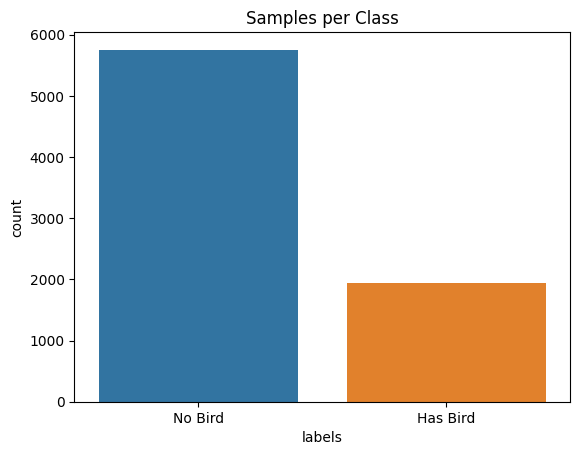

In [ ]:
#Visualizing the distribution of data for the 2 classes
sns.countplot(df, x="labels")
plt.title('Samples per Class')

- There is class imbalance as the number of samples in the 'No Bird' class is greater than those in the 'Has Bird' class. We therefore need to downsample the 'No Bird' class

In [ ]:
majority_class = df['labels'].value_counts().idxmax()
minority_class = df['labels'].value_counts().idxmin()
print(f'Majority Class: {majority_class}')
print(f'Minority Class: {minority_class}')

Majority Class: No Bird
Minority Class: Has Bird


In [ ]:
# Number of samples to remove from the majority class
minority_class_count = len(df[df['labels'] == minority_class])
majority_class_count = len(df[df['labels'] == majority_class])


# Randomly remove samples from the majority class
df_downsampled = df[df['labels'] == majority_class].sample(n=majority_class_count, replace=False)

# Combine the downsampled majority class with the minority class
df_balanced = pd.concat([df_downsampled, df[df['labels'] == minority_class]])

In [ ]:
df_balanced['labels'].value_counts()

labels
No Bird     5755
Has Bird    1935
Name: count, dtype: int64

Text(0.5, 1.0, 'Samples per Class')

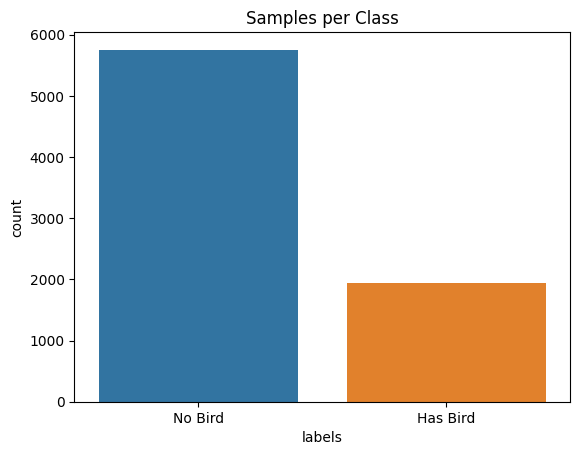

In [ ]:
#Visualizing the distribution of data for the 2 classes
sns.countplot(df_balanced, x="labels")
plt.title('Samples per Class')

- Class Balance has now been achieved

## X-Y Split

In [ ]:
x = np.array(df_balanced['MFCCs'].tolist())
y = df_balanced['labels']

In [ ]:
print(x.shape)
x[:1]

(7690, 40)


array([[-9.5352043e+01,  1.7569977e+02, -3.4752861e+01,  2.3682386e+01,
        -1.4672425e+01,  3.6386306e+00, -3.8650770e+00, -9.2103082e-01,
        -1.0861582e+01,  8.9981407e-01, -6.8716536e+00,  2.7022626e+00,
        -5.5340562e+00, -3.4648516e+00, -5.7670979e+00, -5.9344864e-01,
        -6.6723113e+00,  8.0977160e-01, -3.4970691e+00,  3.3426809e-01,
         1.4091305e-01,  1.7328696e+00, -2.5168371e+00,  3.3865354e+00,
        -2.4198885e+00,  2.8536662e-02, -1.6210545e+00,  6.2765759e-01,
        -1.0470196e+00,  4.3547435e+00, -2.5466902e+00,  2.7906594e+00,
        -4.0719885e-01,  1.8961037e+00,  3.0186355e-01,  3.0251567e+00,
        -1.9377557e+00,  2.0895257e+00, -1.1948539e+00, -7.1708649e-02]],
      dtype=float32)

In [ ]:
print(y.shape)
y.head()

(7690,)


6562    No Bird
940     No Bird
1125    No Bird
3355    No Bird
3390    No Bird
Name: labels, dtype: object

## One-Hot Encoding of Y

In [ ]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
labelencoder=LabelEncoder()

In [ ]:
y = to_categorical(labelencoder.fit_transform(y))
y[:5] #View the first 5 samples

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [ ]:
y.shape

(7690, 2)

## Train-Test Split

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [ ]:
print(X_train.shape)
print(X_test.shape)

(6152, 40)
(1538, 40)


In [ ]:
X_train = X_train.reshape(6152, 10, 4, 1)
X_test = X_test.reshape(1538, 10, 4, 1)

In [ ]:
input_dim = (10, 4, 1)

# **CNN Model**

## Model Training

In [ ]:
# Necessary libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPool2D, Dropout

In [ ]:
model = Sequential()
model.add(Conv2D(64, (3, 3), padding = "same", activation = "relu", input_shape = input_dim))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.1))
model.add(Flatten())
model.add(Dense(1024, activation = "relu"))
model.add(Dense(2, activation = "softmax"))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 10, 4, 64)         640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 5, 2, 64)         0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 5, 2, 128)         73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 2, 1, 128)        0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 2, 1, 128)         0         
                                                                 
 flatten (Flatten)           (None, 256)               0

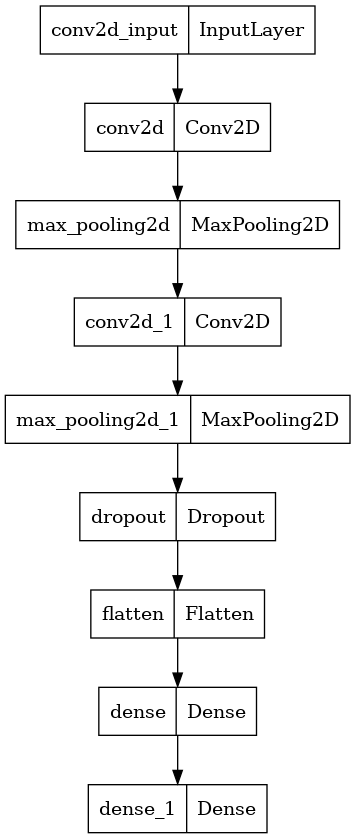

In [ ]:
#Visualizing the Model Architecture
import pydot
tf.keras.utils.plot_model(model)

In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-5)

In [ ]:
model.compile(optimizer = optimizer, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
# We Create a ModelCheckpoint callback to save the best model based on validation accuracy
from tensorflow.keras.callbacks import ModelCheckpoint
checkpoint = ModelCheckpoint(filepath='best_model.h5', monitor='val_acc', save_best_only=True)

In [ ]:
#history = model.fit(X_train, y_train, epochs = 30, batch_size = 50, validation_data = (X_test, y_test))
history = model.fit(X_train, y_train, epochs = 50, batch_size = 50, validation_data = (X_test, y_test))

Epoch 1/50
124/124 [==============================] - 3s 14ms/step - loss: 0.6838 - accuracy: 0.6894 - val_loss: 0.5485 - val_accuracy: 0.7477
Epoch 2/50
124/124 [==============================] - 1s 12ms/step - loss: 0.6103 - accuracy: 0.7178 - val_loss: 0.5431 - val_accuracy: 0.7568
Epoch 3/50
124/124 [==============================] - 1s 11ms/step - loss: 0.5818 - accuracy: 0.7311 - val_loss: 0.5217 - val_accuracy: 0.7685
Epoch 4/50
124/124 [==============================] - 1s 12ms/step - loss: 0.5706 - accuracy: 0.7284 - val_loss: 0.5145 - val_accuracy: 0.7744
Epoch 5/50
124/124 [==============================] - 1s 12ms/step - loss: 0.5499 - accuracy: 0.7464 - val_loss: 0.5116 - val_accuracy: 0.7757
Epoch 6/50
124/124 [==============================] - 1s 12ms/step - loss: 0.5527 - accuracy: 0.7480 - val_loss: 0.5091 - val_accuracy: 0.7776
Epoch 7/50
124/124 [==============================] - 1s 11ms/step - loss: 0.5263 - accuracy: 0.7604 - val_loss: 0.5073 - val_accuracy: 0.7744

In [ ]:
#Plotting the loss curves
pd.DataFrame(history.history).plot(figsize = (8, 5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.title('Training Curves')
plt.show()

## Evaluating Model Perfomance

In [ ]:
predictions = model.predict(X_test)
score = model.evaluate(X_test, y_test)
print(score)

49/49 [==============================] - 0s 3ms/step - loss: 0.4772 - accuracy: 0.7848
[0.47722503542900085, 0.7847854495048523]


In [ ]:
preds = np.argmax(predictions, axis = 1)
y1 = np.argmax(y_test, axis = 1)
preds

array([1, 0, 1, ..., 0, 1, 0])

## Making Predictions with the Model

In [ ]:
def classify_audio(filename):
    #preprocess the audio file
    audio, sample_rate = librosa.load(filename)
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    #Reshape MFCC feature to 2-D array
    mfccs_scaled_features=mfccs_scaled_features.reshape(1, 10, 4, 1)
    #predicted_label=model.predict_classes(mfccs_scaled_features)
    x_predict=model.predict(mfccs_scaled_features)
    predicted_label=np.argmax(x_predict,axis=1)
    #print(predicted_label)
    prediction_class = labelencoder.inverse_transform(predicted_label) [0]
    if prediction_class == 'Oxpecker':
        print(f'Prediction Probability: {x_predict[0][0]}')
    else:
        print(f'Prediction Probability: {x_predict[0][1]}')
    print(f'Predicted Class: {prediction_class}')

In [ ]:
classify_audio('ff1010bird_wav/wav/100275.wav')

1/1 [==============================] - 0s 38ms/step
Prediction Probability: 0.8807641863822937
Predicted Class: No Bird


## Saving the Model

In [ ]:
#Saving to h5
model.save("Bird_Detector.h5")

In [ ]:
#Converting to tflite
model = tf.keras.models.load_model('Bird_Detector.h5')
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

In [ ]:
with open('Bird_Detector.tflite', 'wb') as f:
    f.write(tflite_model)